# An example of using BluePyOpt/NeuronUnit Optimization
Using:
* Allen Brain Experimental data (`specimen_id=325479788`, sweep number `64`) to derive features from.
* EFEL feature extraction
* BluePyOpt Optimization.
* Numba JIT simple cell models (Izhikevich, Adaptive Exponential).
* Neuronunit model scoring

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="paper", font="monospace")
%matplotlib inline
SILENT = True
import warnings
if SILENT:
    warnings.filterwarnings("ignore")

from neuronunit.plotting.plot_utils import check_bin_vm_soma
from neuronunit.allenapi.allen_data_driven import opt_setup
from nb_utils import optimize_job
from sciunit.scores import RelativeDifferenceScore
import pandas as pd
import pickle
import quantities as pq
specimen_id = 325479788


test


In [2]:
def test_opt_relative_diff(specimen_id,model_type = "ADEXP",efel_filter_iterable=None):
    fitnesses,scores,obs_preds,opt,target,hall_of_fame,cell_evaluator = optimize_job(specimen_id,
                                                 model_type,
                                                 score_type=RelativeDifferenceScore,
                                                 efel_filter_iterable=efel_filter_iterable)
    print(fitnesses)
    return obs_preds,opt,target,hall_of_fame,cell_evaluator


# Below is a plot of vm trace for fitting the simple model to with neuron unit.
* It is from Allen Specimen id `325479788`, sweep number `64`.
* sweep number 


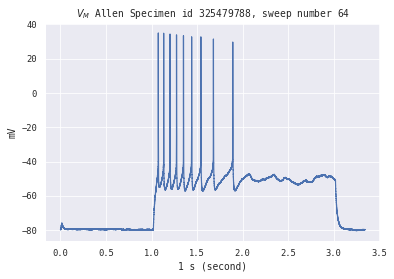

In [3]:
with open('325479788later_allen_NU_tests.p', "rb") as f:
    suite = pickle.load(f)
    
plt.plot(suite.traces["vm_soma"].times,suite.traces["vm_soma"])
plt.xlabel(pq.s)
plt.ylabel(suite.traces["vm_soma"].dimensionality)
plt.title("$V_{M}$ Allen Specimen id 325479788, sweep number 64")
plt.show()


# Example 1
* Izhikevich model 
* Allen specimen 325479788
You will notice that all the features are timinig related, and some would seem redudandant. This is because one must use brute force to get a good fit, for this particular problem.

Next can use sensativity analysis on the genes to find out which genes needed varying.

In [4]:
efel_filter_iterable = [
    "ISI_log_slope",
    "mean_frequency",
    "adaptation_index2",
    "first_isi",
    "ISI_CV",
    "median_isi",
    "Spikecount",
    "all_ISI_values",
    "ISI_values",
    "time_to_first_spike",
    "time_to_last_spike",
    "time_to_second_spike"
    ]
#    "AHP_depth_abs",
obs_preds,opt,target,hall_of_fame,cell_evaluator = test_opt_relative_diff(specimen_id = 325479788,model_type="IZHI",efel_filter_iterable=efel_filter_iterable)
#"voltage_after_stim"


gen	nevals	avg    	std    	min    	max  
1  	150   	5130.89	8238.13	19.3253	19000


2  	141   	4604.47	7897.15	19.3253	19000
3  	54    	463.798	2594.5 	19.3253	19000
4  	56    	565.378	2937.53	19.3253	19000
5  	54    	841.074	3758.13	19.0392	19000
6  	57    	1282.62	4694.32	19.0392	19000
7  	59    	977.541	4100.83	17.7486	19000
8  	56    	1301.89	4691.77	17.7486	19000
9  	58    	1278.15	4695.51	11.3627	19000
10 	53    	499.686	2938.9 	11.3627	19000
11 	53    	800.911	3762.21	11.3627	19000
12 	53    	1428.16	4959.91	10.3858	19000
13 	55    	1575   	5206.72	7.9962 	19000
14 	45    	1260.15	4699.4 	7.9962 	19000
15 	55    	1572.34	5207.51	3.47145	19000
16 	56    	480.662	2940.45	3.04489	19000
17 	59    	479.213	2940.68	3.04489	19000
18 	56    	164.862	1712.3 	3.04489	19000
19 	55    	318.333	2411.8 	3.04489	19000
20 	52    	161.364	1712.61	3.04489	19000
21 	55    	162.303	1712.53	3.04489	19000
22 	57    	6.46508	6.2283 	3.04489	41.3222
23 	57    	7.74298	6.21192	3.04489	45.5158
24 	54    	8.71551	6.01824	3.04489	41.4118
25 	53    	164.993	1712.28	3.04489	19000  
26 	58  

192	35    	12.8466	9.80238	0.609564	33.7097
193	33    	6.22789	6.41371	0.609564	28.0646
194	36    	10.301 	6.50034	0.609564	45.2998
195	21    	5.99726	4.49903	0.609564	28.3941
196	43    	6.7137 	4.24116	0.609564	21.0332
197	36    	318.891	2411.72	0.609564	19000  
198	32    	5.36486	5.02585	0.609564	41.317 
199	31    	160.874	1712.66	0.609564	19000  
200	29    	2.66322	3.95457	0.609564	21.0016
201	36    	160.893	1712.66	0.609564	19000  
202	28    	158.7  	1712.85	0.609564	19000  
203	35    	3.17743	6.83572	0.609564	41.3641
204	31    	3.92415	6.53385	0.609564	45.2705
205	26    	3.75571	4.93298	0.609564	30.2372
206	24    	5.56151	5.09636	0.609564	31.2888
207	17    	6.83968	4.26532	0.609564	18.2623
208	31    	161.394	1712.61	0.609564	19000  
209	32    	2.95069	3.85144	0.609564	24.7373
210	26    	160.987	1712.65	0.609564	19000  
211	32    	3.6368 	3.81772	0.609564	23.1692
212	25    	6.15856	4.56623	0.609564	29.3976
213	38    	5.70122	5.57761	0.609564	32.431 
214	33    	4.19117	4.5889 	0.609


[135.03602585915957, 1.4776605092504214, -71.84058695745065, -44.92993213333238, 40.25071107407602, 0.010004310004393278, 14.732705820974624, -59.69461263565651, -12.189602680407354, 6.788139333355208] the gene
0.3976174586189967


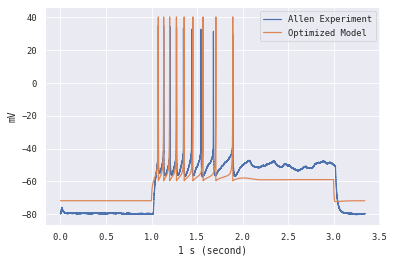

In [5]:

check_bin_vm_soma(target,opt)

In [6]:
params = opt.attrs_to_params()
params = pd.DataFrame([params])
params

,C,k,vr,vt,vPeak,a,b,c,d,celltype
0,135.04,1.48,-71.84,-44.93,40.25,0.01,14.73,-59.69,-12.19,7


In [7]:
df = pd.DataFrame(obs_preds)
df.rename(columns={0:'EFEL_feature_NU_test_Name',1:'prediction',2:'observation',3:'neuronunit_score'},inplace=True)
df

,EFEL_feature_NU_test_Name,prediction,observation,neuronunit_score
0,ISI_log_slope,0.485704,0.486931,Relative Difference = 0.00
1,mean_frequency,10.086294,10.087424,Relative Difference = 0.00
2,adaptation_index2,0.091943,0.086453,Relative Difference = 0.01
3,ISI_CV,0.476055,0.389111,Relative Difference = 0.09
4,Spikecount,9.000000,9.000000,Relative Difference = 0.00
5,all_ISI_values,102.212500,102.187500,Relative Difference = 0.02
6,ISI_values,108.400000,108.385714,Relative Difference = 0.01
7,time_to_first_spike,74.600000,74.700000,Relative Difference = 0.10
8,time_to_last_spike,892.300000,892.200000,Relative Difference = 0.10
9,time_to_second_spike,133.500000,133.500000,Relative Difference = 0.00


# Example 2
* Now fit Adaptive Exponential model to a single sweep from Allen specimen 325479788 sweep number 64

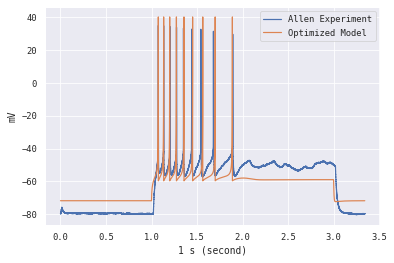

In [10]:
check_bin_vm_soma(target,opt)

In [18]:
params = opt.attrs_to_params()
params = pd.DataFrame([params])
params

,C,k,vr,vt,vPeak,a,b,c,d,celltype
0,110.0,0.92,-65.0,-45.0,25.0,0.11,6.5,-50.0,47.5,5
